In [9]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath("../implementations")) 
from ukf import UnscentedKalmanFilter
from ekf import ExtendedKalmanFilter

# UKF (Unscented) vs EKF (Extended)
### Key Differences: UKF computes linearization via sigma points and EKF computes linearization via Jacobian matrix using first order DE

In [2]:
def f(x, u=None):
    dt = 0.1
    return np.array([x[0] + dt * np.sin(x[0])])

def h(x):
    return np.array([np.sin(x[0])])

def F_jacobian(x, u=None):
    dt = 0.1
    return np.array([[1 + dt * np.cos(x[0])]])

def H_jacobian(x):
    return np.array([[np.cos(x[0])]])

## Data Generation

In [4]:
np.random.seed(0)
N = 100
x_true = np.array([0.5])
x_est_ekf = np.array([0.0])
x_est_ukf = np.array([0.0])

P = np.eye(1) * 0.1
Q = np.eye(1) * 0.01
R = np.eye(1) * 0.05

true_states = []
measurements = []
ekf_estimates = []
ukf_estimates = []
ekf_cov_trace = []
ukf_cov_trace = []

## UKF & EKF

In [5]:
ekf = ExtendedKalmanFilter(f=f, h=h, F_jacobian=F_jacobian, H_jacobian=H_jacobian, Q=Q, R=R, P=P.copy(), x0=x_est_ekf.copy())
ukf = UnscentedKalmanFilter(f=f, h=h, Q=Q, R=R, P=P.copy(), x0=x_est_ukf.copy())

### Simulation

In [6]:
for _ in range(N):
    # True state and noisy measurement
    x_true = f(x_true) + np.random.multivariate_normal(mean=[0], cov=Q)
    z = h(x_true) + np.random.multivariate_normal(mean=[0], cov=R)

    # EKF update
    ekf.predict()
    x_ekf = ekf.update(z)

    # UKF update
    ukf.predict()
    x_ukf = ukf.update(z)

    # Store results
    true_states.append(x_true[0])
    measurements.append(z[0])
    ekf_estimates.append(x_ekf[0])
    ukf_estimates.append(x_ukf[0])
    ekf_cov_trace.append(ekf.get_covariance()[0, 0])
    ukf_cov_trace.append(ukf.get_covariance()[0, 0])

## Plotting

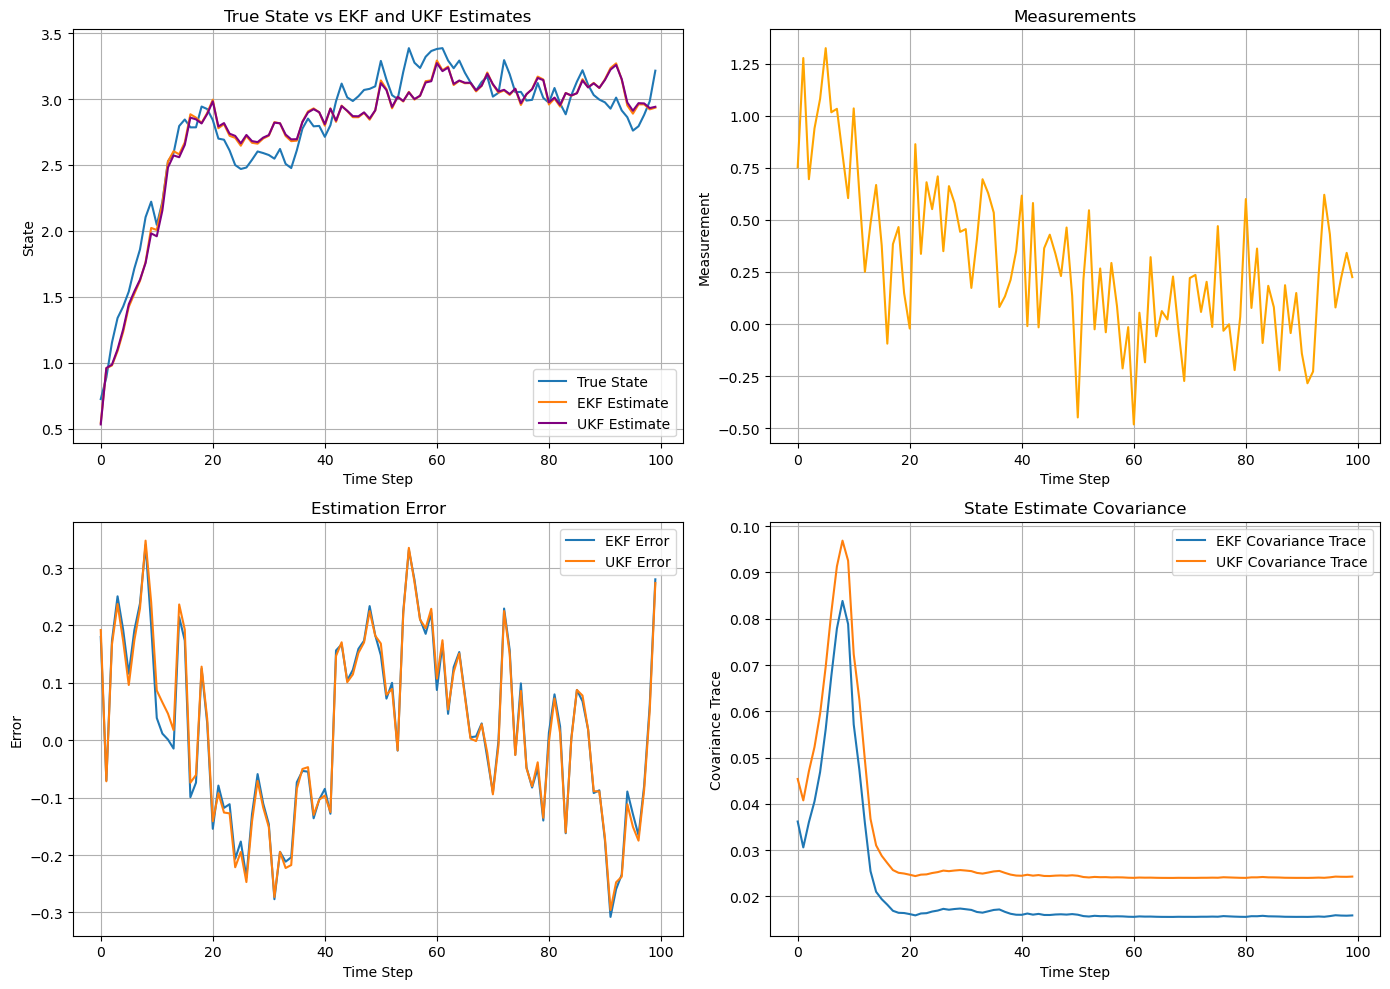

In [15]:
# ----- Plotting -----
time = np.arange(N)
plt.figure(figsize=(14, 10))

# State estimates
plt.subplot(2, 2, 1)
plt.plot(time, true_states, label='True State')
plt.plot(time, ekf_estimates, label='EKF Estimate')
plt.plot(time, ukf_estimates, label='UKF Estimate', color='purple')
plt.title('True State vs EKF and UKF Estimates')
plt.xlabel('Time Step')
plt.ylabel('State')
plt.legend()
plt.grid(True)

# Measurements
plt.subplot(2, 2, 2)
plt.plot(time, measurements, label='Noisy Measurements', color='orange')
plt.title('Measurements')
plt.xlabel('Time Step')
plt.ylabel('Measurement')
plt.grid(True)

# Estimation Errors
plt.subplot(2, 2, 3)
ekf_error = np.array(true_states) - np.array(ekf_estimates)
ukf_error = np.array(true_states) - np.array(ukf_estimates)
plt.plot(time, ekf_error, label='EKF Error')
plt.plot(time, ukf_error, label='UKF Error')
plt.title('Estimation Error')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

# Covariance Traces
plt.subplot(2, 2, 4)
plt.plot(time, ekf_cov_trace, label='EKF Covariance Trace')
plt.plot(time, ukf_cov_trace, label='UKF Covariance Trace')
plt.title('State Estimate Covariance')
plt.xlabel('Time Step')
plt.ylabel('Covariance Trace')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()